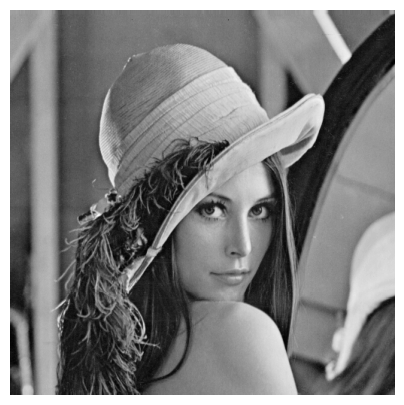

In [1]:
from skimage import data, color
import matplotlib.pyplot as plt
import cv2 as cv2
path = "Lena.png" 
img = cv2.imread(path,0)

plt.figure(figsize=(5, 5))
plt.imshow(img, cmap='gray')
plt.axis('off')
plt.show()


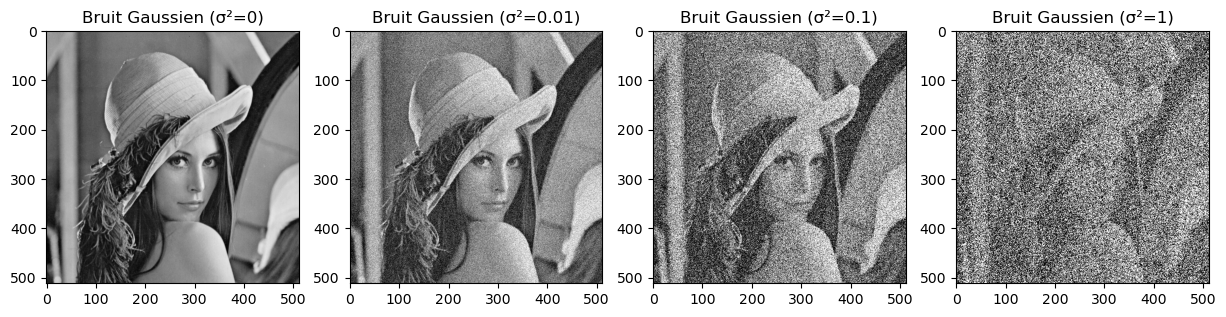

In [2]:
from skimage.util import random_noise

variances = [0,0.01, 0.1, 1]
i=1
plt.figure(figsize=(15, 7))

for sigma_squared in variances:
    imGauss = random_noise(img, mode='gaussian', var=sigma_squared)
    plt.subplot(1, 4, i)
    plt.imshow(imGauss, cmap='gray')
    plt.title(f"Bruit Gaussien (σ²={sigma_squared})")
    i+=1


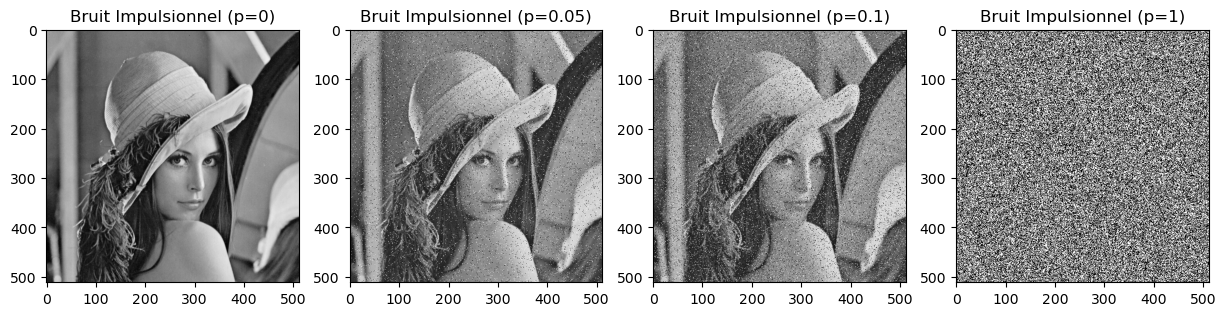

In [3]:
p = [0,0.05, 0.1, 1]
i=1
plt.figure(figsize=(15, 7))

for p in p:
    imSP = random_noise(img, mode='s&p', amount=p)
    plt.subplot(1, 4, i)
    plt.imshow(imSP, cmap='gray')
    plt.title(f"Bruit Impulsionnel (p={p})")
    i+=1


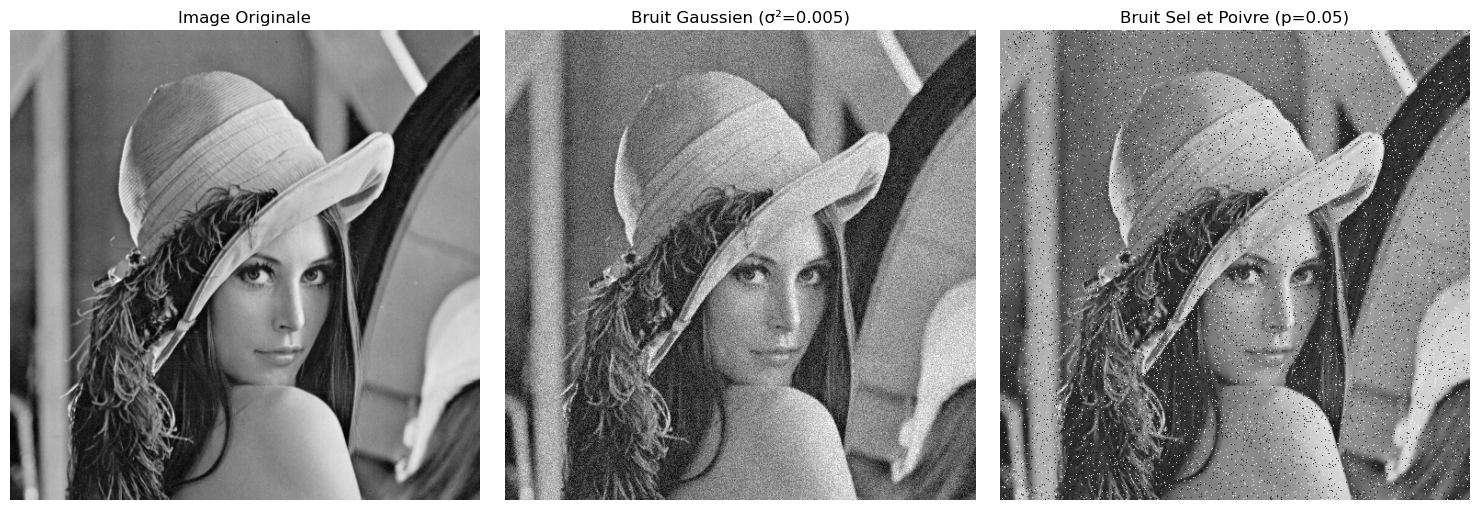

In [4]:
from skimage.util import random_noise
import numpy as np
sigma_square = 0.005
imGauss = random_noise(img, mode='gaussian', var=sigma_square)
imGauss = (imGauss * 255).astype(np.uint8)

p = 0.05
imSP = random_noise(img, mode='s&p', amount=p)
imSP = (imSP * 255).astype(np.uint8)

fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes[0].imshow(img, cmap='gray')
axes[0].set_title("Image Originale")
axes[0].axis('off')

axes[1].imshow(imGauss, cmap='gray')
axes[1].set_title(f"Bruit Gaussien (σ²={sigma_square})")
axes[1].axis('off')

axes[2].imshow(imSP, cmap='gray')
axes[2].set_title(f"Bruit Sel et Poivre (p={p})")
axes[2].axis('off')

plt.tight_layout()
plt.show()


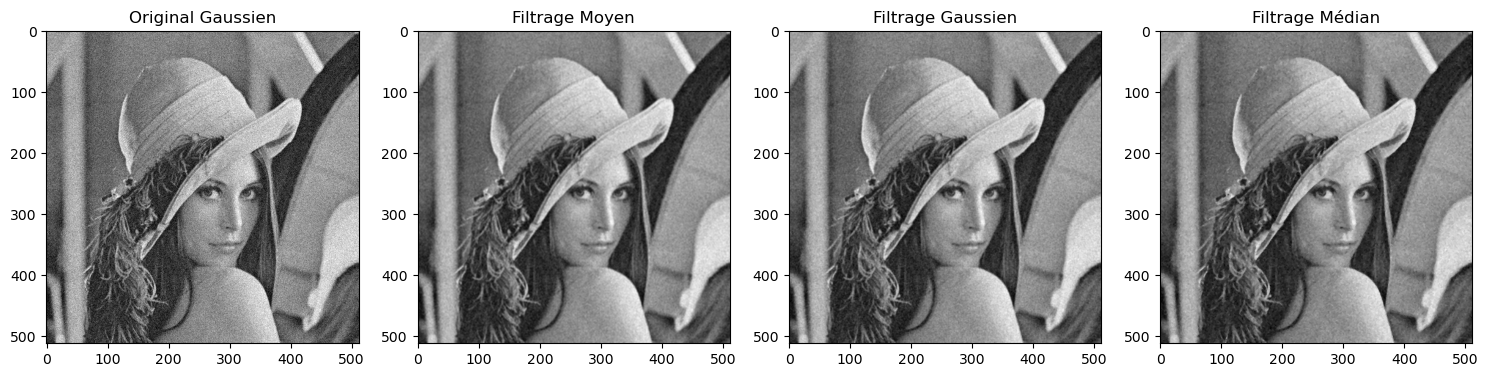

In [5]:
ksize = (3, 3)
imGaussblur = cv2.blur(imGauss, ksize)
blur = cv2.GaussianBlur(imGauss, ksize, 0)
median = cv2.medianBlur(imGauss, 3)

plt.figure(figsize=(15, 7))

plt.subplot(1, 4, 1)
plt.imshow(imGauss, cmap='gray')
plt.title("Original Gaussien")

plt.subplot(1, 4, 2)
plt.imshow(imGaussblur, cmap='gray')
plt.title("Filtrage Moyen")

plt.subplot(1, 4, 3)
plt.imshow(blur, cmap='gray')
plt.title("Filtrage Gaussien")

plt.subplot(1, 4, 4)
plt.imshow(median, cmap='gray')
plt.title("Filtrage Médian")

plt.tight_layout()
plt.show()

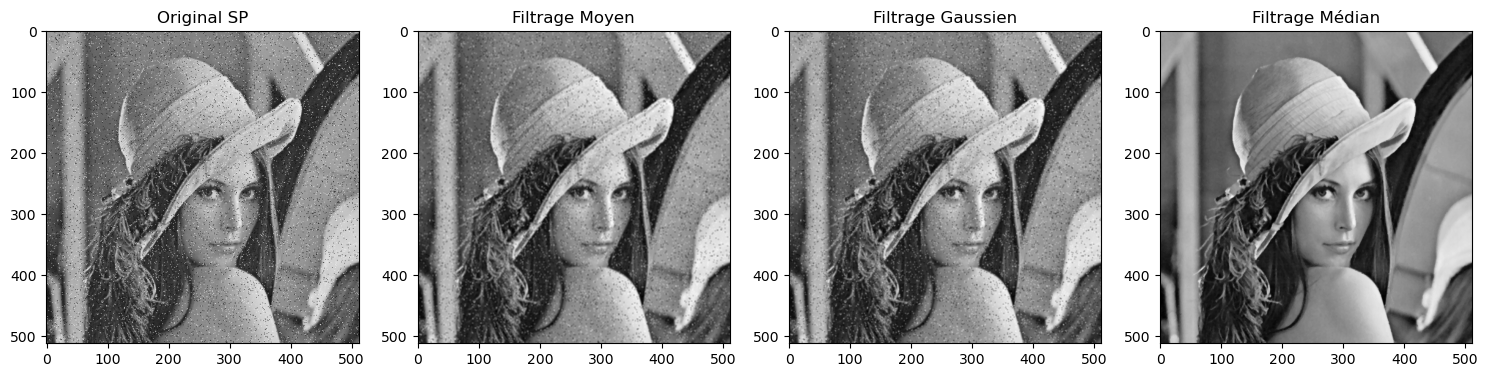

In [6]:
ksize = (3, 3)
imSPblur = cv2.blur(imSP, ksize)
blur1 = cv2.GaussianBlur(imSP, ksize, 0)
median1 = cv2.medianBlur(imSP, 3)

plt.figure(figsize=(15, 7))

plt.subplot(1, 4, 1)
plt.imshow(imSP, cmap='gray')
plt.title("Original SP")

plt.subplot(1, 4, 2)
plt.imshow(imSPblur, cmap='gray')
plt.title("Filtrage Moyen")

plt.subplot(1, 4, 3)
plt.imshow(blur1, cmap='gray')
plt.title("Filtrage Gaussien")

plt.subplot(1, 4, 4)
plt.imshow(median1, cmap='gray')
plt.title("Filtrage Médian")

plt.tight_layout()
plt.show()

In [7]:
def calculate_mse(image_orig, image_eq):
    N, M = image_orig.shape
    mse = np.sum((image_orig - image_eq) ** 2) / (N * M)
    return mse

def calculate_psnr(mse, max_val=255):
    psnr = 10 * np.log10((max_val ** 2) / mse)
    return psnr

def calculate_sd(image_eq):
    sd = np.std(image_eq)
    return sd

moyen
----------------------------------
mse 83.8171615600586
psnr 28.89747411357395
----------------------------------
mse 86.27680587768555
psnr 28.77186302501537
----------------------------------
mse 87.33607482910156
psnr 28.718866914686217
----------------------------------
----------------------------------
gaussian
mse 81.26037216186523
psnr 29.03201553861097
----------------------------------
mse 85.1444091796875
psnr 28.829242246247922
----------------------------------
mse 85.89677810668945
psnr 28.79103486637691
----------------------------------


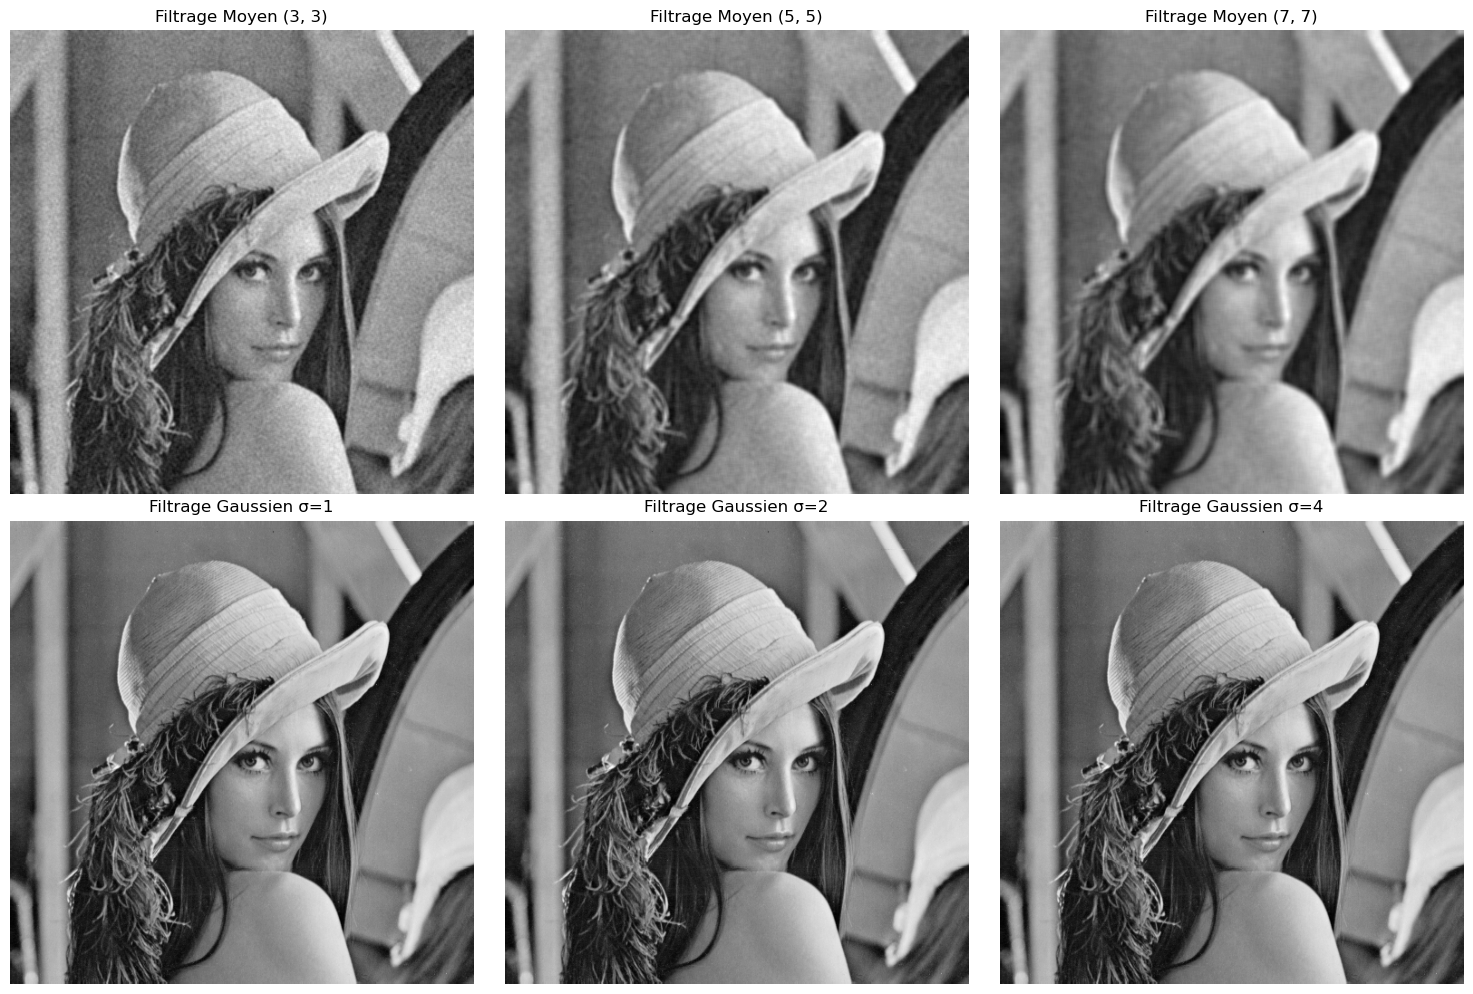

In [8]:
ksize_mean = [(3, 3), (5, 5), (7, 7)]
mean_filtered_images = [cv2.blur(imGauss, ks) for ks in ksize_mean]

sigma_values = [1, 2, 4]
gaussian_filtered_images = [cv2.GaussianBlur(imGauss, (5, 5), sigmaX) for sigmaX in sigma_values]

plt.figure(figsize=(15, 10))

print( 'moyen')
print( '----------------------------------')

for i, imgi in enumerate(mean_filtered_images, 1):
    mse = calculate_mse(imGauss, imgi)
    psnr = calculate_psnr(mse)
    print('mse', mse)
    print('psnr', psnr)
    print( '----------------------------------')


    plt.subplot(2, len(ksize_mean), i)
    plt.imshow(imgi, cmap='gray')
    plt.title(f"Filtrage Moyen {ksize_mean[i-1]}")
    plt.axis('off')

  

print( '----------------------------------')
print( 'gaussian')
    
for i, imgi in enumerate(gaussian_filtered_images, 1):
    mse = calculate_mse(imGauss, imgi)
    psnr = calculate_psnr(mse)
    print('mse', mse)
    print('psnr', psnr)
    print( '----------------------------------')

    
    plt.subplot(2, len(sigma_values), len(ksize_mean) + i)
    plt.imshow(img, cmap='gray')
    plt.title(f"Filtrage Gaussien σ={sigma_values[i-1]}")
    plt.axis('off')

plt.tight_layout()
plt.show()